# Assignment 2: Analyse Results

## 2.1 Tabular Learning

### 2.1.1 Data Efficiency

**Online Q-learning**

* $\text{number_of_steps}$ = $1e3$ and $\text{num_offline_updates}$ = $0$

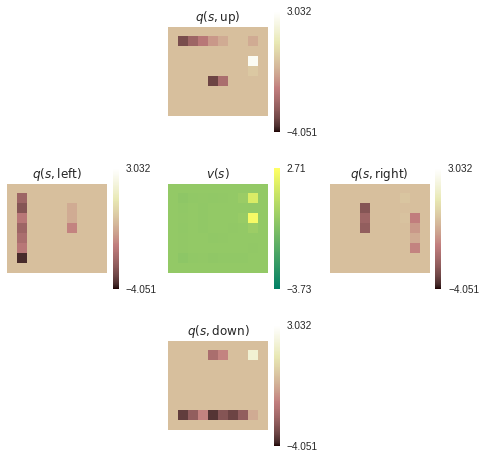

In [75]:
grid = Grid()
agent = ExperienceQ(
  grid._layout.size, 4, grid.get_obs(),
  random_policy, num_offline_updates=0, step_size=0.1)
run_experiment(grid, agent, int(1e3))
q = agent.q_values.reshape(grid._layout.shape + (4,))
plot_action_values(q)

**Experience Replay**

* $\text{number_of_steps}$ = $1e3$ and $\text{num_offline_updates}$ = $30$

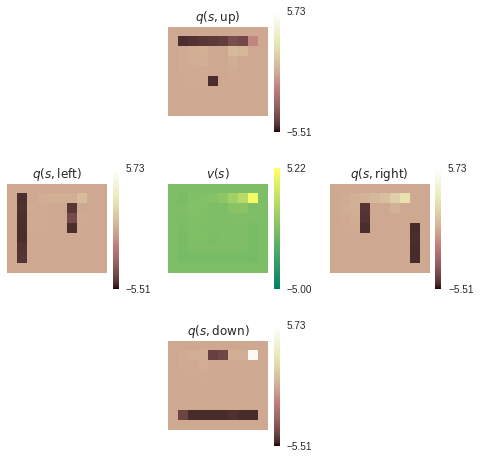

In [76]:
grid = Grid()
agent = ExperienceQ(
  grid._layout.size, 4, grid.get_obs(),
  random_policy, num_offline_updates=30, step_size=0.1)
run_experiment(grid, agent, int(1e3))
q = agent.q_values.reshape(grid._layout.shape + (4,))
plot_action_values(q)

**DynaQ**

* $\text{number_of_steps}$ = $1e3$ and $\text{num_offline_updates}$ = $30$

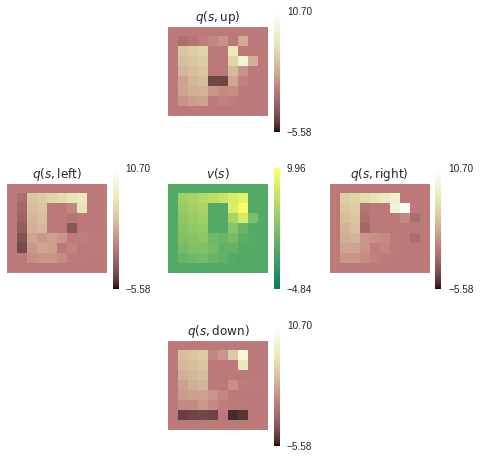

In [77]:
grid = Grid()
agent = DynaQ(
  grid._layout.size, 4, grid.get_obs(),
  random_policy, num_offline_updates=30, step_size=0.1)
run_experiment(grid, agent, int(1e3))
q = agent.q_values.reshape(grid._layout.shape + (4,))
plot_action_values(q)

### 2.1.2 Computational Cost

What if sampling from the environment is cheap and I don't care about data efficiency but only care about the number of updates to the model?

How do Online Q-learning, ExperienceReplay and Dyna-Q compare if I apply the same number of total updates?

**Online Q-learning**

* $\text{number_of_steps}$ = $3e4$ and $\text{num_offline_updates}$ = $0$



/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


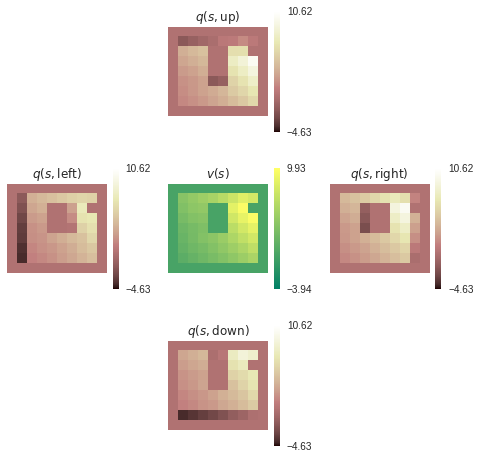

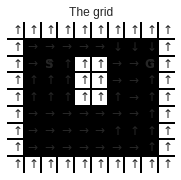

In [78]:
grid = Grid()
agent = ExperienceQ(
  grid._layout.size, 4, grid.get_obs(),
  random_policy, num_offline_updates=0, step_size=0.1)
run_experiment(grid, agent, int(3e4))
q = agent.q_values.reshape(grid._layout.shape + (4,))
plot_action_values(q)
plot_greedy_policy(grid, q)

**ExperienceReplay**

* $\text{number_of_steps}$ = $1e3$ and $\text{num_offline_updates}$ = $30$

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


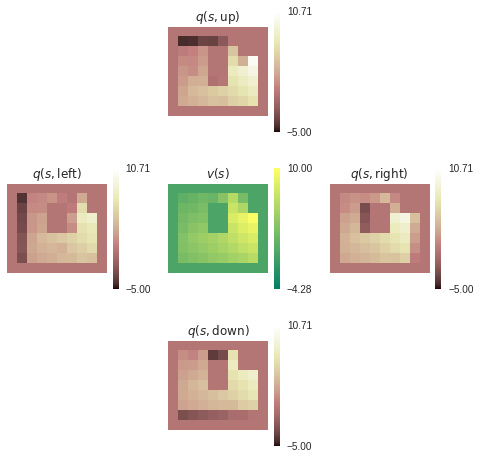

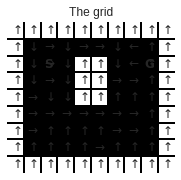

In [79]:
grid = Grid()
agent = ExperienceQ(
  grid._layout.size, 4, grid.get_obs(),
  random_policy, num_offline_updates=30, step_size=0.1)
run_experiment(grid, agent, int(1e3))
q = agent.q_values.reshape(grid._layout.shape + (4,))
plot_action_values(q)
plot_greedy_policy(grid, q)

**DynaQ**

* $\text{number_of_steps}$ = $1e3$ and $\text{num_offline_updates}$ = $30$

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


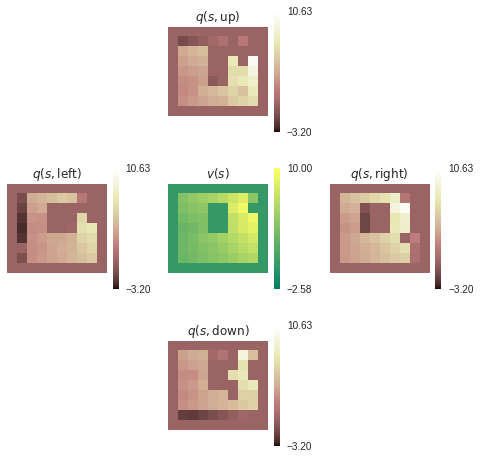

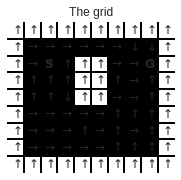

In [80]:
grid = Grid()
agent = DynaQ(
  grid._layout.size, 4, grid.get_obs(),
  random_policy, num_offline_updates=30, step_size=0.1)
run_experiment(grid, agent, int(1e3))
q = agent.q_values.reshape(grid._layout.shape + (4,))
plot_action_values(q)
plot_greedy_policy(grid, q)

## 2.3 Linear function approximation

We will now consider the $\text{FeatureGrid}$ domain.

And evaluate $\text{Q-learning}$, $\text{Experience Replay}$ and $\text{DynaQ}$, in the context of linear function approximation.

All experiments are run for $\text{number_of_steps}$ = $1e5$

**Online Q-learning with Linear Function Approximation**

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


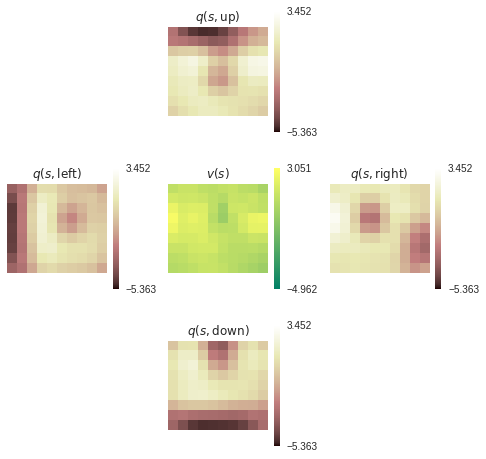

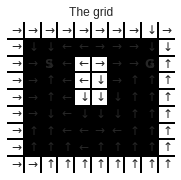

In [81]:
grid = FeatureGrid()

agent = FeatureExperienceQ(
  number_of_features=grid.number_of_features, number_of_actions=4,
  number_of_states=grid._layout.size, initial_state=grid.get_obs(),
  num_offline_updates=0, step_size=0.01, behaviour_policy=random_policy)
run_experiment(grid, agent, int(1e5))
q = np.reshape(
    np.array([agent.q(grid.int_to_features(i)) for i in xrange(grid.number_of_states)]),
    [grid._layout.shape[0], grid._layout.shape[1], 4])
plot_action_values(q)
plot_greedy_policy(grid, q)

**Experience Replay with Linear Function Approximation**

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


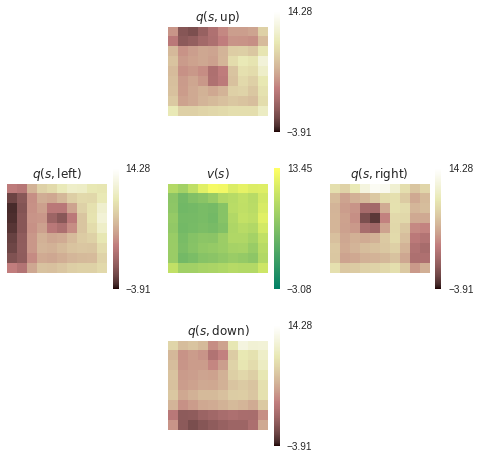

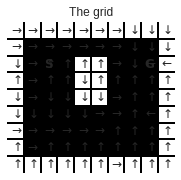

In [82]:
grid = FeatureGrid()

agent = FeatureExperienceQ(
  number_of_features=grid.number_of_features, number_of_actions=4,
  number_of_states=grid._layout.size, initial_state=grid.get_obs(),
  num_offline_updates=10, step_size=0.01, behaviour_policy=random_policy)
run_experiment(grid, agent, int(1e5))
q = np.reshape(
    np.array([agent.q(grid.int_to_features(i)) for i in xrange(grid.number_of_states)]),
    [grid._layout.shape[0], grid._layout.shape[1], 4])
plot_action_values(q)
plot_greedy_policy(grid, q)

**DynaQ with Linear Function Approximation**

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


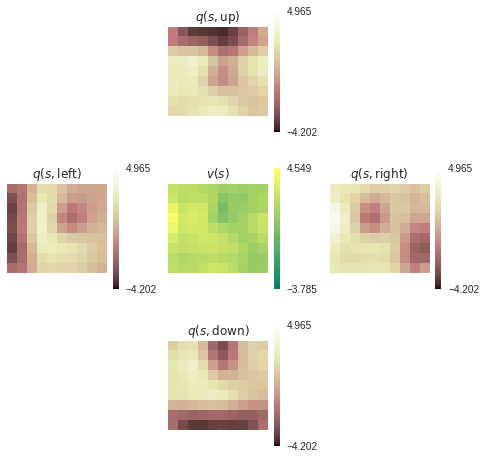

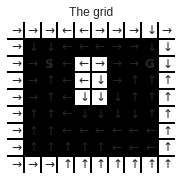

In [83]:
grid = FeatureGrid()

agent = FeatureDynaQ(
  number_of_features=grid.number_of_features, 
  number_of_actions=4,
  number_of_states=grid._layout.size, 
  initial_state=grid.get_obs(),
  num_offline_updates=10, 
  step_size=0.01,
  behaviour_policy=random_policy)

run_experiment(grid, agent, int(1e5))
q = np.reshape(
    np.array([agent.q(grid.int_to_features(i)) for i in xrange(grid.number_of_states)]),
    [grid._layout.shape[0], grid._layout.shape[1], 4])
plot_action_values(q)
plot_greedy_policy(grid, q)

## 2.4 Non stationary Environments

We now consider a non-stationary setting where after `pretrain_steps` in the environment, the goal is moved to a new location (from the top-right of the grid to the bottom-left).

The agent is allowed to continue training for a (shorter) amount of time in this new setting, and then we evaluate the value estimates.

In [0]:
pretrain_steps = 2e4
new_env_steps = pretrain_steps / 30

**Online Q-learning**

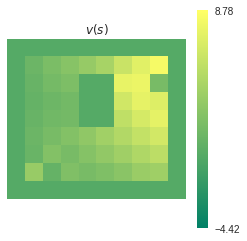

In [91]:
# Train on first environment
grid = Grid()
agent = ExperienceQ(
    
  grid._layout.size, 4, grid.get_obs(),
  random_policy, num_offline_updates=0, step_size=0.1)
run_experiment(grid, agent, int(pretrain_steps))
q = agent.q_values.reshape(grid._layout.shape + (4,))
# plot_state_value(q)

# Change goal location
alt_grid = AltGrid()
run_experiment(alt_grid, agent, int(new_env_steps))
alt_q = agent.q_values.reshape(alt_grid._layout.shape + (4,))
plot_state_value(alt_q)

**Experience Replay**

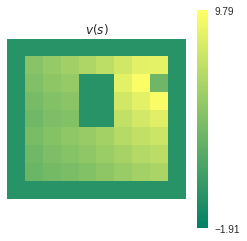

In [86]:
# Train on first environment
grid = Grid()
agent = ExperienceQ(
  grid._layout.size, 4, grid.get_obs(),
  random_policy, num_offline_updates=30, step_size=0.1)
run_experiment(grid, agent, int(pretrain_steps))
q = agent.q_values.reshape(grid._layout.shape + (4,))
# plot_state_value(q)

# Change goal location
alt_grid = AltGrid()
run_experiment(alt_grid, agent, int(new_env_steps))
alt_q = agent.q_values.reshape(alt_grid._layout.shape + (4,))
plot_state_value(alt_q)

**Dyna**

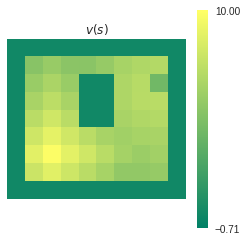

In [87]:
# Train on first environment
grid = Grid()
agent = DynaQ(
  grid._layout.size, 4, grid.get_obs(),
  random_policy, num_offline_updates=30, step_size=0.1)
run_experiment(grid, agent, int(pretrain_steps))
q = agent.q_values.reshape(grid._layout.shape + (4,))
# plot_state_value(q)

# Change goal location
alt_grid = AltGrid()
run_experiment(alt_grid, agent, int(new_env_steps))
alt_q = agent.q_values.reshape(alt_grid._layout.shape + (4,))
plot_state_value(alt_q)

## Questions

### Basic Tabular Learning

**[5 pts]** Why is the ExperienceReplay agent so much more data efficient than online Q-learning?

Because it re-uses past experience and learns from it with multiple samples at each step in the episode, while online Q-learning only learns from the online update to the q-values. This essentially means it is learning multiple times on past data rather than once.

**[5 pts]** If we run the experiments for the same number of updates, rather than the same number of steps in the environment, which among online Q-learning and Experience Replay performs better? Why?

Q-learning, because it makes more efficient use of each update because it gains new experience with each update, and can therefore get more overall experience. Experience Replay only gets a small number of samples for the offline learning, and so overfits to this data.

**[5 pts]** Which among online Q-learning and Dyna-Q is more data efficient? why?

Dyna-Q, because it makes use of past experience, like Experience Replay, and can therefore learn more from the same number of steps/episodes. It can learn multiples times from the same past experience rather than just once.

**[5 pts]** If we run the experiments for the same number of updates, rather than the same number of steps in the environment, which among online Q-learning and Dyna-Q performs better? Why?

Online Q-learning would perform better again, as it again has more overall experience with the environment to work with, whereas Dyna-Q has much less and therefore overfits.

### Linear function approximation

**[5 pts]** The value estimates with function approximation are considerably more blurry than in the tabular setting despite more training steps and interactions with the environment, why is this the case?

Because the states are now represented by a feature vector generated using gaussian distributions, so the information we have about the true state of the agent in the environment is much noisier. As a result, the state-action values learned are also noisy. The model used is also linear, which implies a smoothness between states which causes states which are close to each other in the feature space to "share" some q-value high/low regions where they should be kept separate.

**[5 pts]** Inspect the policies derived by training agents with linear function approximation on `FeatureGrid` (as shown by `plot_greedy_policy`). How does this compare to the optimal policy? Are there any inconsistencies you can spot? What is the reason of these?

These policies are far from optimal - the noisyness of the feature vector and resulting q values means that the policy is much more sensitive to nearby rewards, rather than long term ones (i.e., preferring to avoid walls than to reach the goal). A greedy policy derived from linear function approximation may not even reach the goal, as some of the arrows in the greedy policy plot point away from the goal and so the agent may get stuck in some local minima. Between online Q-learning, experience replay and Dyna-Q, there isn't much difference between the resulting q values, except that experience replay has a more concentrated high state values around the goal - this may be because only experience replay samples directly from the history when getting the predicted next state/reward/discount and so doesn't propagate these values back through to the rest of the grid states.

### Learning in a non stationary environment

Consider now the tabular but non-stationary setting of section 2.4.

After an initial pretraining phase, the goal location is moved to a new location, where the agent is allowed to train for some (shorter) time.

**[10 pts]** Compare the value estimates of online Q-learning and Experience Replay, after training also on the new goal location, explain what you see. 

Online Q-learning learns about the new environment when the goal changes position, as can be seen by the lighter state values at the location of the new goal. Experience replay does not appear to learn after this change - this would be because it is always learning from past experience, despite that experience being for an old environment. Since it is sampling uniformly across all historical steps, it will take an extremely long time for it to adjust to the new setting.

**[10 pts]** Compare the value estimates of online Q-learning and Dyna-Q, after training also on the new goal location, explain what you see.

Back up your observations with visualizations of the value/policy.

Because Dyna-Q uses a tabular model, and because this environment is deterministic and we can update the tabular model simply with the last received next state/reward/discount value, then Dyna-Q is able to immediately learn about the new goal location because the model updates instantaneously once the new reward is observed. If the environment was non-deterministic, and our tabular model instead used, for example, the average next state/reward/discount values (picking the most common next state), then the tabular model wouldn't update instantly (since it would only incrementally affect the average next state/reward/discount), and the effect on the performance on the non stationary environment would be similar as to experience replay.

